In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.style.use("seaborn-poster")
%matplotlib inline

In [3]:
def FFT(x_n):
    
    ''' The recursive implementation of the 1D Cooley-Tuckey FFT,
    the input should have a length of power of 2. '''
    N = len(x_n)
    
    if N == 1:    #(base condition of recursion)
        return x_n
    
    else:
        x_even = FFT(x_n[::2])
        '''x[::2]reads “default start index (i.e. zero index element), default stop index (i.e. up to the end),
        step size is two—take every second element”.'''
        
        x_odd = FFT(x_n[1::2])
        '''x[1::2] means, start the consideration from one indexed element then, stop is default(i.e. end), 
        then the step size is two, i.e. only alternate element is considered. Therefore, starting with 1st element, only odd ele
        will be considered'''
        # Now, even indexed elements of array are stored in X_even and vice versa.
        
        k = np.arange(N)
        factor = np.exp(-2j*np.pi*k/N)
        
        # factor[:int(N/2)], means consider the start of array at 0 index and end at (N/2) index. 
        
        x_k = np.concatenate([x_even + factor[:int(N/2)]*x_odd,
                            x_even + factor[int(N/2):]*x_odd])
        '''last two line of code is not very clear'''
        
        return x_k                            

# old program for the x_n

In [4]:
def sin_wave(freq, amplitude, phase, time_grid):
    
    omega = 2*np.pi*freq
    y = amplitude*np.sin(omega*time_grid + phase)
    
    return y

# sampling rate 
sr = 128
s = 1.0/sr
t = np.arange(0,1,s)

freq_mu_1 = 1
amp_1 = 3
phase_1 = 0
wave_1 = sin_wave(freq_mu_1, amp_1, phase_1, t)

freq_mu_2 = 4
amp_2 = 1
phase_2 = 0
wave_2 = sin_wave(freq_mu_2, amp_2, phase_2, t)

freq_mu_3 = 7
amp_3 = 0.5
phase_3 = 0
wave_3 = sin_wave(freq_mu_3, amp_3, phase_3, t)

final_wave = wave_1 + wave_2 + wave_3

print(final_wave.shape)

(128,)


# Calling the FFT function

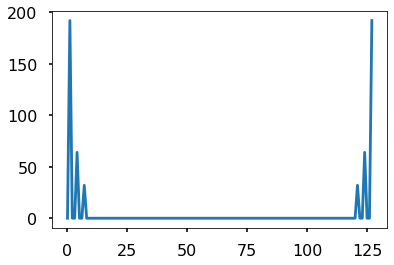

In [5]:
x_k = FFT(final_wave)
N = len(x_k)
n = np.arange(N)
T = N/sr
freq = n/T

plt.plot(freq, abs(x_k))

(-1.0, 20.0)

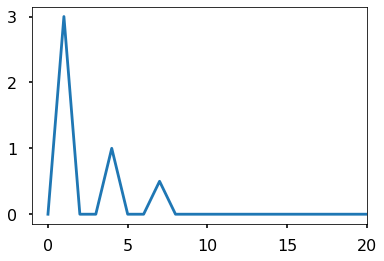

In [6]:
n_oneside = (N/2)
f_oneside = freq[:int(n_oneside)]


# normalising the amplitude
xk_oneside = x_k[:int(n_oneside)]/n_oneside

plt.plot(f_oneside, abs(xk_oneside))
plt.xlim(-1,20)

# Using Python library

In [7]:
from numpy.fft import fft, ifft

In [17]:
x_k = fft(final_wave)

# Creating the k-grid
# N is the total numbers of samples taken in for the final_wave function
# sr is the number of sample in one second
# therefore if the x(final) - x(initial) = 1; (as in this case), 
# we wil have T = 1, otherwise the T value wil differ.

N = len(x_k)
n = np.arange(N)
T = N / sr
freq_l = n/T

print(sr, N)

128 128


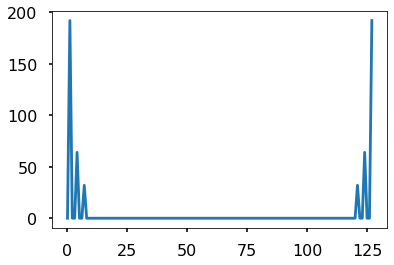

In [18]:
plt.plot(freq_l, abs(x_k))

In [19]:
x_ifft_lib = ifft(x_k)
N = len(x_ifft_lib)
t = np.linspace(0,1,N)

/home/user/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


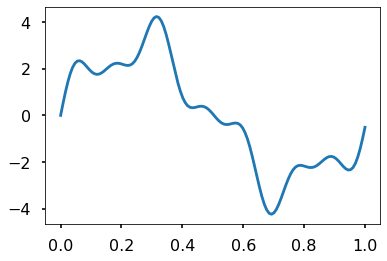

In [11]:
plt.plot(t, x_ifft_lib)